In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [112]:
data1 = pd.read_excel("Data.xlsx",'Data')

In [36]:
trans =  pd.read_excel('KPMG_data.xlsx', 'Trans')

In [37]:
cust = pd.read_excel('KPMG_data.xlsx', 'Cust')

In [38]:
new_cust = pd.read_excel('KPMG_data.xlsx', 'NewCustomerList')

In [81]:
data2 = trans.merge(cust, how="left",on = "customer_id")

In [113]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13632 entries, 0 to 19444
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       13632 non-null  int64         
 1   product_id                           13632 non-null  int64         
 2   customer_id                          13632 non-null  int64         
 3   transaction_date                     13632 non-null  datetime64[ns]
 4   online_order                         13632 non-null  bool          
 5   order_status                         13632 non-null  object        
 6   brand                                13632 non-null  object        
 7   product_line                         13632 non-null  object        
 8   product_class                        13632 non-null  object        
 9   product_size                         13632 non-null  object        
 10  list_price

In [97]:
data2.dropna(inplace = True)

In [99]:
import datetime as DT
now = DT.datetime.now()
data2['age'] = (now - data2['DOB'])/365

In [100]:
data2['age'] = data2['age'].dt.days.astype('int16')
data2['age']

0        66
1        42
2        43
3        59
5        62
         ..
19439    43
19440    26
19441    46
19442    47
19444    24
Name: age, Length: 13632, dtype: int16

In [111]:
age_band = [] 
for value in data2["age"]: 
    if value > 90: 
        age_band.append("100") 
    elif value <= 90 and value >80: 
        age_band.append("90")
    elif value <= 80 and value >70: 
        age_band.append("80")
    elif value <= 70 and value >60: 
        age_band.append("70")
    elif value <= 60 and value >50: 
        age_band.append("60")
    elif value <= 50 and value >40: 
        age_band.append("50")
    elif value <= 40 and value >30: 
        age_band.append("40")
    elif value <= 30 and value >20: 
        age_band.append("30")
    elif value <= 20 and value >10: 
        age_band.append("20")
    else: 
        age_band.append("10") 
       
data2["age_band"] = age_band    
print(data2) 

       transaction_id  product_id  customer_id transaction_date  online_order  \
0                   1           2         2950       2017-02-25         False   
1                   2           3         3120       2017-05-21          True   
2                   3          37          402       2017-10-16         False   
3                   4          88         3135       2017-08-31         False   
5                   6          25         2339       2017-03-08          True   
...               ...         ...          ...              ...           ...   
19439           19995           9          718       2017-05-13          True   
19440           19996          51         1018       2017-06-24          True   
19441           19997          41          127       2017-11-09          True   
19442           19998          87         2284       2017-04-14          True   
19444           20000          11         1144       2017-09-22          True   

      order_status         

In [102]:
data2.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_band
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,...,19.0,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,66,70
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,...,89.0,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,42,40
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,...,9.0,1977-06-03,Desktop Support Technician,Retail,Affluent Customer,N,No,22.0,43,40
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,...,83.0,1962-01-14,Staff Scientist,Financial Services,Mass Customer,N,No,16.0,59,60
5,6,25,2339,2017-03-08,True,Approved,Giant Bicycles,Road,medium,medium,...,3.0,1958-12-28,Web Designer II,Property,Affluent Customer,N,Yes,16.0,62,70


In [103]:
len(data2)

13632

<AxesSubplot:xlabel='online_order', ylabel='count'>

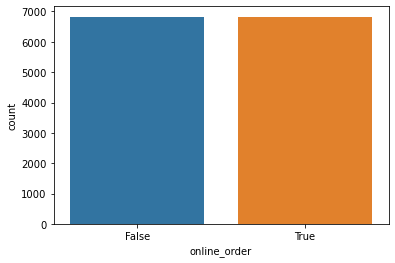

In [117]:
sns.countplot(x='online_order',data = data2)

<AxesSubplot:xlabel='gender', ylabel='count'>

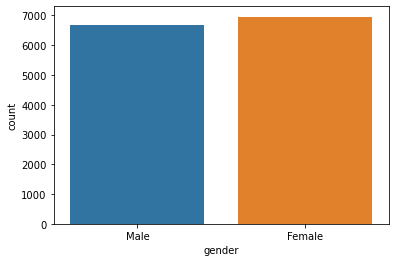

In [118]:
sns.countplot(x='gender',data = data2)

<AxesSubplot:xlabel='age_band', ylabel='count'>

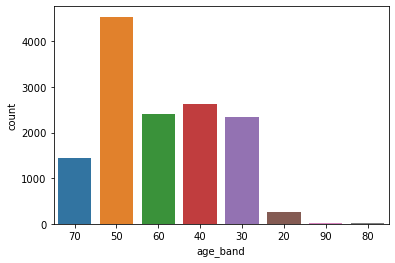

In [128]:
sns.countplot(x='age_band',data = data2)

<AxesSubplot:xlabel='age_band', ylabel='profit'>

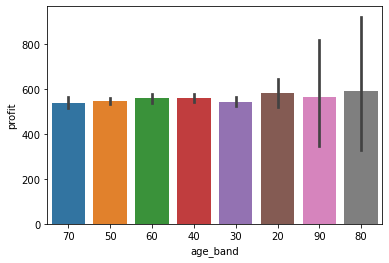

In [121]:
sns.barplot(x='age_band',y='profit', data=data2)

<AxesSubplot:xlabel='age_band', ylabel='past_3_years_bike_related_purchases'>

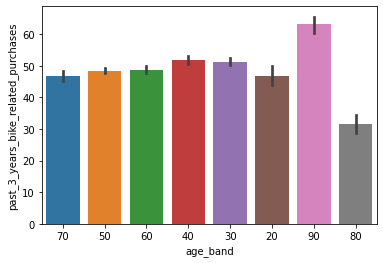

In [122]:
sns.barplot(x='age_band',y='past_3_years_bike_related_purchases', data=data2)

<module 'matplotlib.tight_layout' from 'C:\\Users\\Siddhant\\anaconda3.8\\lib\\site-packages\\matplotlib\\tight_layout.py'>

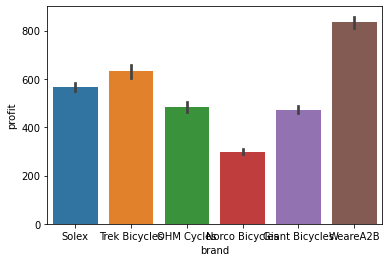

In [127]:
sns.barplot(x='brand',y='profit', data=data2)
plt.tight_layout

In [106]:
new_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           983 non-null    object        
 1   last_name                            954 non-null    object        
 2   gender                               983 non-null    object        
 3   past_3_years_bike_related_purchases  983 non-null    int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            878 non-null    object        
 6   job_industry_category                818 non-null    object        
 7   wealth_segment                       983 non-null    object        
 8   deceased_indicator                   983 non-null    object        
 9   owns_car                             983 non-null    object        
 10  tenure        

In [105]:
new_cust.dropna(subset=['DOB'], inplace = True)

In [107]:
import datetime as DT
now = DT.datetime.now()
new_cust['age'] = (now - new_cust['DOB'])/365

In [108]:
new_cust['age'] = new_cust['age'].dt.days.astype('int16')
new_cust['age']

0      63
1      50
2      46
3      42
4      55
       ..
995    61
996    19
997    66
998    68
999    65
Name: age, Length: 983, dtype: int16

In [110]:
age_band = [] 
for value in new_cust["age"]: 
    if value > 90: 
        age_band.append("100") 
    elif value <= 90 and value >80: 
        age_band.append("90")
    elif value <= 80 and value >70: 
        age_band.append("80")
    elif value <= 70 and value >60: 
        age_band.append("70")
    elif value <= 60 and value >50: 
        age_band.append("60")
    elif value <= 50 and value >40: 
        age_band.append("50")
    elif value <= 40 and value >30: 
        age_band.append("40")
    elif value <= 30 and value >20: 
        age_band.append("30")
    elif value <= 20 and value >10: 
        age_band.append("20")
    else: 
        age_band.append("10") 
       
new_cust["age_band"] = age_band    
print(new_cust) 

    first_name  last_name  gender  past_3_years_bike_related_purchases  \
0      Chickie    Brister    Male                                   86   
1        Morly     Genery    Male                                   69   
2      Ardelis  Forrester  Female                                   10   
3       Lucine      Stutt  Female                                   64   
4      Melinda     Hadlee  Female                                   34   
..         ...        ...     ...                                  ...   
995  Ferdinand  Romanetti    Male                                   60   
996       Burk    Wortley    Male                                   22   
997   Melloney      Temby  Female                                   17   
998     Dickie    Cubbini    Male                                   30   
999      Sylas    Duffill    Male                                   56   

           DOB                     job_title job_industry_category  \
0   1957-07-12               General Mana

<AxesSubplot:xlabel='Customer_Title', ylabel='count'>

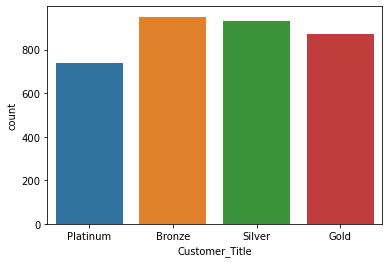

In [114]:
sns.countplot(x='Customer_Title',data= data1)